In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *

# Dogs and cats

## rn34

In [3]:
data = image_data_from_folder(Path('../data/dogscats'), 
    ds_tfms=get_transforms(), tfms=imagenet_norm, size=224)

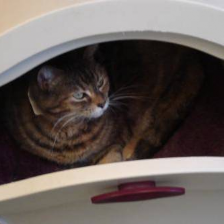

In [4]:
data.valid_ds[1][0]

In [5]:
learn = ConvLearner(data, tvm.resnet34, metrics=accuracy)

In [6]:
learn.fit_one_cycle(1)

RuntimeError: Traceback (most recent call last):
  File "/home/jhoward/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 114, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/jhoward/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 114, in <listcomp>
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/data1/jhoward/git/fastai_v1/fastai/vision/data.py", line 146, in __getitem__
    x = apply_tfms(self.tfms, x, **self.kwargs)
  File "/data1/jhoward/git/fastai_v1/fastai/vision/image.py", line 420, in apply_tfms
    else: x = tfm(x)
  File "/data1/jhoward/git/fastai_v1/fastai/vision/image.py", line 336, in __call__
    return self.tfm(x, *args, **{**self.resolved, **kwargs}) if self.do_run else x
  File "/data1/jhoward/git/fastai_v1/fastai/vision/image.py", line 280, in __call__
    if args: return self.calc(*args, **kwargs)
  File "/data1/jhoward/git/fastai_v1/fastai/vision/image.py", line 285, in calc
    if self._wrap: return getattr(x, self._wrap)(self.func, *args, **kwargs)
  File "/data1/jhoward/git/fastai_v1/fastai/vision/image.py", line 155, in coord
    self.flow = func(self.flow, self.shape, *args, **kwargs)
  File "/data1/jhoward/git/fastai_v1/fastai/vision/transform.py", line 160, in symmetric_warp
    return _perspective_warp(c, targ_pts)
  File "/data1/jhoward/git/fastai_v1/fastai/vision/transform.py", line 145, in _perspective_warp
    return _apply_perspective(c, _find_coeffs(_orig_pts, targ_pts))
  File "/data1/jhoward/git/fastai_v1/fastai/vision/transform.py", line 128, in _find_coeffs
    return torch.gesv(B,A)[0][:,0]
RuntimeError: gesv : Lapack library not found in compile time
 at /opt/conda/conda-bld/pytorch-nightly_1538062385791/work/aten/src/TH/generic/THLapack.cpp:50


In [ ]:
learn.save('rn34')

In [ ]:
learn.load('rn34')

In [ ]:
lr2=3e-4
learn.unfreeze()
learn.fit_one_cycle(6, slice(lr2/25,lr2), pct_start=0.05)

In [ ]:
learn.save('rn34.2')

In [ ]:
accuracy(*learn.TTA())

## rn50

In [ ]:
learn = ConvLearner(data, tvm.resnet50, metrics=accuracy)

In [ ]:
learn.fit_one_cycle(6)

In [ ]:
lr2=3e-4
learn.unfreeze()
learn.fit_one_cycle(6, slice(lr2/25,lr2), pct_start=0.05)

In [ ]:
learn.save('rn50')

In [ ]:
accuracy(*learn.TTA())

## Fin

In [ ]:
data = data_from_imagefolder(Path('data/dogscats'),
    ds_tfms=get_transforms(), tfms=imagenet_norm, size=224)
learn = ConvLearner(data, tvm.resnet34, metrics=accuracy)
learn.fit_one_cycle(6)
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-5,3e-4))

In [ ]:
accuracy(*learn.TTA())